In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import snscrape.modules.twitter as sntwitter
import csv
import string
from collections import Counter
#nltk.download()
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import re

# Twitter Developer API

In [2]:
#https://developer.twitter.com/en/portal/dashboard

API_KEY = 'JYW7WsKbVLqOnhJZd4Kqfwtfk'
API_SECRET = 'sPAUmw4DQhnb4aGmZD1B8On7Z8SJzegycAfQEM9wGL3GFwx4ni'
ACCESS_TOKEN = '900524114976296960-vBIQ0CoAWvP4kfSctnB3ejV5bJpNMqw'
ACCESS_TOKEN_SECRET = 'egd1tOSY0LYKB1fxjPTBCvPPtYMIhJmlAI6HZ7Z09Zv7j'

a = tweepy.OAuthHandler(API_KEY, API_SECRET)
a.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
API = tweepy.API(a)

# Twitter Trending Now

In [3]:
#https://www.woeids.com/ # WOEID of London
woeid = 44418
trendingnow = API.get_place_trends(id = woeid)
print("Trending now in London:")
 
for trend in trendingnow:
    trends = []
    for tr in trend['trends']:
        trends.append(tr['name'])
print(trends)    

Trending now in London:
['#SundayBrunch', 'Human Rights', 'Popcaan', '#SundayFunday', 'Wilder', '#conservativeleadership', '#ASongOrMovieForFarmers', 'Suella', 'Lyon', 'ADHD', 'McLaren', 'Tugendhat', 'Kante', 'Beckham', 'Aguero', 'Black Widow', 'Braverman', 'Nicki', 'Wireless', 'Truss', 'Kyrgios', 'Sainz', 'Ferrari', 'ECHR', 'Charles', 'Perez', 'Andrew Castle', 'Russell', 'Verstappen', 'Prince George', 'Alonso', 'Jo Cox', 'Krygios', 'Hunt', 'Plan E', 'Marshalls', 'Mick', 'Oscar Pistorius', 'Esther McVey', 'Checo', 'Red Bull', 'Haas', 'Gasly', 'Penny Mordaunt', 'Paqueta', 'Lando', 'Jonnie', 'Belarus', 'Iniesta']


# Collect Tweets around area

In [4]:
import snscrape.modules.twitter as sntwitter
import csv

maxTweets = 700
#Create csv file, or append data into
text = open('London_tweets.csv', 'a', newline='', encoding='utf8')

#write tweets into csv file
textWriter = csv.writer(text)
textWriter.writerow(['id','date','username','tweet']) 

#Radius around 100 miles around the custom geo code
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:51.51147,-0.1220,100mi \
                                        + since:2022-07-01 until:2022-07-07 -filter:links -filter:replies').get_items()):
    if i > maxTweets :
            break

    textWriter.writerow([tweet.id, tweet.date, tweet.user.username, tweet.content])   
    
text.close()

# Pre-processing, Cleaning

In [5]:
text = open('London_tweets.csv', encoding='utf-8').read()

In [6]:
lower_case = text.lower()

In [7]:
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [8]:
# word_tokenize 
tokenized_words = word_tokenize(cleaned_text, "english")

In [9]:
# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [10]:
# Lemmatization - From plural to single, and Base form of a word
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)      
#print(lemma_words)

## 5 Most Popular hastags

In [11]:
hashtg = re.findall(r"#(\w+)", lower_case)
print(hashtg)

['talkswithash', 'lagosswindler', 'canterburytales', 'lagosswindlers', 'rony', 'palmeiras', 'chelsea', 'dybala', 'milan', 'cfc', 'borisout', 'borisjohnsonmustresign', 'byeboris', 'borisjohnsonmustgo', 'borisjohnson', 'trump', 'boris', 'johnsonmustgo', 'lagosswindlers', 'lastlast', 'avax', 'mitb', 'wwesmackdown', 'nowplaying', 'tonicskaradio', 'firstplay', 'bbc6music', 'loveisland', 'timefortrump', 'topray', 'pbrisingstars', 'talkswithash', 'loveisland', 'nowplaying', 'chris', 'hortonpark', 'epsom', 'nowplaying', 'loveisland', 'loveisland', 'firstplay', 'bbcr1', 'makeitmiami', 'loveisland', 'talkswithash', 'talkswithash', 'luxor', 'egypt', 'loveisland', 'topray', 'loveisland', 'itshappening', 'loveisland', 'rtitbot', 'الحلول', 'wordle383', 'bbcnewsnight', 'msmarvel', 'nevergiveup', 'willtowin', 'newsnight', 'gove', 'cillianmurphy', 'backtotheisland', 'wordle', 'wordle383', 'loveisland', 'np', 'afrohouse', 'amapiano', 'drumsradio', 'punkaintdead', 'trafficandweather', 'portofdover', 'pea

In [12]:
# Lemmatization - From plural to single, and Base form of a word
lemma_w = []
for hashw in hashtg:
    hashw = WordNetLemmatizer().lemmatize(hashw)
    lemma_w.append(hashw)      
print(lemma_w)

['talkswithash', 'lagosswindler', 'canterburytales', 'lagosswindlers', 'rony', 'palmeiras', 'chelsea', 'dybala', 'milan', 'cfc', 'borisout', 'borisjohnsonmustresign', 'byeboris', 'borisjohnsonmustgo', 'borisjohnson', 'trump', 'boris', 'johnsonmustgo', 'lagosswindlers', 'lastlast', 'avax', 'mitb', 'wwesmackdown', 'nowplaying', 'tonicskaradio', 'firstplay', 'bbc6music', 'loveisland', 'timefortrump', 'topray', 'pbrisingstars', 'talkswithash', 'loveisland', 'nowplaying', 'chris', 'hortonpark', 'epsom', 'nowplaying', 'loveisland', 'loveisland', 'firstplay', 'bbcr1', 'makeitmiami', 'loveisland', 'talkswithash', 'talkswithash', 'luxor', 'egypt', 'loveisland', 'topray', 'loveisland', 'itshappening', 'loveisland', 'rtitbot', 'الحلول', 'wordle383', 'bbcnewsnight', 'msmarvel', 'nevergiveup', 'willtowin', 'newsnight', 'gove', 'cillianmurphy', 'backtotheisland', 'wordle', 'wordle383', 'loveisland', 'np', 'afrohouse', 'amapiano', 'drumsradio', 'punkaintdead', 'trafficandweather', 'portofdover', 'pea

## 5 Most Active Users

In [13]:
df = pd.read_csv('London_tweets.csv')
df = df.drop(columns = ['id','date'])
df.head(5)

,username,tweet
0,WokinghamWeatha,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...
1,gk3020,Sorry guys… you will have to drag me out of no...
2,_ACasso,My heart just skipped a beat seeing “The Lord ...
3,prowerrr_,Your mother could be LGBTQ\nYour father could ...
4,mylewishamilton,EU GRITEI TANTO NESSE GOL


In [14]:
df.isnull().sum()

username    0
tweet       0
dtype: int64

In [15]:
len(df)

701

In [16]:
#df['username'].unique()
userlist = df['username'].value_counts()
most_active_users = userlist.head(5)
most_active_users

pgnyash           12
SpikellaxGrimm    11
queenlathifath    10
Sep1914Antonio     8
ftg_soccer         6
Name: username, dtype: int64

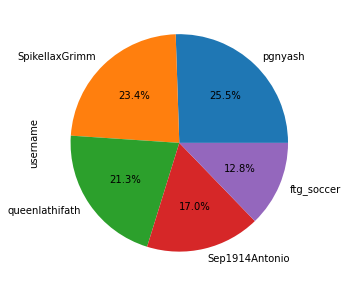

In [17]:
plot_users=most_active_users.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.savefig("Piechart",transparent=False, bbox_inches='tight',pad_inches=0.1)

## Sentiment Analysis with nltk

In [18]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HENNY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
df1 = df.drop(columns = ['username'])
df1.head(5)

,tweet
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...
1,Sorry guys… you will have to drag me out of no...
2,My heart just skipped a beat seeing “The Lord ...
3,Your mother could be LGBTQ\nYour father could ...
4,EU GRITEI TANTO NESSE GOL


In [20]:
#df1.value_counts()
sid.polarity_scores(df1.loc[0]['tweet'])

{'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'compound': -0.1531}

In [21]:
df1.dropna(inplace=True)
blanks = []  
for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)  
df1.drop(blanks, inplace=True)

In [22]:
#df1['tweet'].value_counts()
df1['score'] = df1['tweet'].apply(lambda review: sid.polarity_scores(review))
df1['compound']  = df1['score'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment'] = df1['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
df1.head(10)

,tweet,score,compound,sentiment
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...,"{'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'comp...",-0.1531,negative
1,Sorry guys… you will have to drag me out of no...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",-0.5267,negative
2,My heart just skipped a beat seeing “The Lord ...,"{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'comp...",0.5423,positive
3,Your mother could be LGBTQ\nYour father could ...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...",0.4215,positive
4,EU GRITEI TANTO NESSE GOL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
5,Castillo is hands down one of the funniest peo...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.5574,positive
6,desayunando ya por fin 🙏,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
7,tell me why kyle is tutting me in his sleep ff...,"{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'comp...",-0.7906,negative
8,I could watch cooking shows for the rest of my...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
9,Thinking of doing a live listening party for b...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.4019,positive


In [23]:
df1['tweet'][1]

'Sorry guys… you will have to drag me out of no 10.its too cosy and comfy in here. My skin is Too thick .'

In [24]:
df1['tweet'][9]

'Thinking of doing a live listening party for burnas album'

# Topic extraction with LDA (Latent Dirichlet Allocation)

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(min_df=1,max_df=0.9,stop_words='english')
dm = countv.fit_transform(df1['tweet'])
dm

<701x3768 sparse matrix of type '<class 'numpy.int64'>'
	with 6068 stored elements in Compressed Sparse Row format>

In [26]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(dm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [27]:
countv.get_feature_names()[1111]

'ficar'

In [28]:
len(countv.get_feature_names())

3768

In [29]:
import random
for i in range(5):
    random_word_id = random.randint(0,1120)
    print(countv.get_feature_names()[random_word_id])

ccd1
cette
doida
brown
change


In [30]:
for i in range(4):
    random_word_id = random.randint(0,1232)
    print(countv.get_feature_names()[random_word_id])

daenerys
effects
currently
feetgoddess


In [31]:
LDA.components_

array([[0.20000212, 0.2000061 , 0.20000916, ..., 0.20000315, 0.20000315,
        0.20000274],
       [0.20000226, 0.20000597, 0.20000921, ..., 0.20000333, 0.20000333,
        0.2000029 ],
       [1.19999107, 0.20000712, 3.20331573, ..., 0.20000323, 0.20000323,
        0.20000281],
       [0.2000022 , 0.20000613, 0.20000931, ..., 0.20000328, 0.20000328,
        0.20000285],
       [0.20000235, 1.19997469, 1.19665659, ..., 1.199987  , 1.199987  ,
        2.1999887 ]])

In [32]:
len(LDA.components_[0])

3768

In [33]:
eachtopic = LDA.components_[0]

In [34]:
eachtopic.argsort()

array([3520, 3496, 3253, ..., 2145, 1600, 1320], dtype=int64)

In [35]:
eachtopic[183]

0.20000089671088062

In [36]:
# Top 5 words for this topic:
eachtopic.argsort()[-5:]

array([3135,  857, 2145, 1600, 1320], dtype=int64)

In [37]:
word_top = eachtopic.argsort()[-5:]
for index in word_top:
    print(countv.get_feature_names()[index])

want
don
palmeiras
just
h70


In [57]:
for index,topic in enumerate(LDA.components_):
    print(f'5 Most common discussed topic #{index}')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-5:]])
    print('\n')

5 Most common discussed topic #0
['want', 'don', 'palmeiras', 'just', 'h70']


5 Most common discussed topic #1
['really', 'h70', 'time', 'eu', 'like']


5 Most common discussed topic #2
['نون', 'نمشے', 'que', 'ol97', 'w77']


5 Most common discussed topic #3
['just', 'um', 'dey', 'time', 'think']


5 Most common discussed topic #4
['new', 'just', '383', 'wordle', 'gt']




In [39]:
dm

<701x3768 sparse matrix of type '<class 'numpy.int64'>'
	with 6068 stored elements in Compressed Sparse Row format>

In [40]:
dm.shape

(701, 3768)

In [41]:
topic_res = LDA.transform(dm)

In [42]:
topic_res.shape

(701, 5)

In [43]:
topic_res[0]

array([0.52028334, 0.01055084, 0.44806772, 0.01053113, 0.01056697])

In [44]:
topic_res[0].round(2)

array([0.52, 0.01, 0.45, 0.01, 0.01])

In [45]:
topic_res[0].argmax()

0

In [46]:
df1.head()

,tweet,score,compound,sentiment
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...,"{'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'comp...",-0.1531,negative
1,Sorry guys… you will have to drag me out of no...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",-0.5267,negative
2,My heart just skipped a beat seeing “The Lord ...,"{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'comp...",0.5423,positive
3,Your mother could be LGBTQ\nYour father could ...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...",0.4215,positive
4,EU GRITEI TANTO NESSE GOL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive


In [47]:
topic_res.argmax(axis=1)

array([0, 3, 2, 1, 0, 0, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 4, 1, 4, 4, 1, 1,
       0, 2, 0, 1, 4, 0, 1, 0, 1, 3, 1, 3, 3, 0, 2, 0, 4, 2, 2, 0, 4, 1,
       2, 4, 4, 3, 0, 3, 2, 0, 0, 3, 1, 2, 4, 0, 0, 0, 3, 1, 2, 2, 2, 2,
       3, 3, 3, 2, 2, 1, 4, 0, 2, 1, 4, 3, 4, 4, 0, 3, 4, 2, 3, 4, 2, 3,
       1, 1, 4, 3, 4, 1, 0, 1, 0, 3, 2, 0, 3, 0, 3, 0, 3, 4, 1, 3, 4, 1,
       3, 1, 0, 0, 4, 1, 1, 4, 0, 2, 1, 1, 0, 0, 4, 2, 0, 3, 1, 3, 4, 1,
       4, 0, 3, 0, 4, 3, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 1, 1, 0, 0, 2, 3,
       4, 1, 1, 3, 3, 0, 0, 2, 3, 0, 2, 3, 2, 3, 2, 0, 2, 2, 0, 0, 0, 4,
       4, 1, 4, 2, 2, 1, 4, 2, 2, 2, 4, 2, 3, 4, 4, 2, 1, 4, 3, 1, 4, 3,
       2, 2, 0, 2, 1, 4, 3, 4, 3, 2, 2, 1, 4, 1, 4, 3, 0, 2, 1, 4, 2, 3,
       4, 4, 4, 2, 0, 1, 0, 3, 1, 3, 1, 4, 4, 1, 2, 3, 1, 4, 0, 3, 2, 1,
       2, 2, 3, 3, 3, 2, 0, 2, 0, 3, 1, 4, 0, 1, 1, 1, 1, 1, 0, 0, 3, 0,
       3, 2, 4, 0, 1, 1, 0, 1, 3, 3, 2, 2, 4, 4, 2, 4, 3, 1, 3, 1, 0, 0,
       2, 1, 0, 1, 4, 4, 3, 4, 1, 3, 2, 3, 1, 0, 2,

In [48]:
df1['Topic'] = topic_res.argmax(axis=1)

In [49]:
df1.head(5)

,tweet,score,compound,sentiment,Topic
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...,"{'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'comp...",-0.1531,negative,0
1,Sorry guys… you will have to drag me out of no...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",-0.5267,negative,3
2,My heart just skipped a beat seeing “The Lord ...,"{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'comp...",0.5423,positive,2
3,Your mother could be LGBTQ\nYour father could ...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...",0.4215,positive,1
4,EU GRITEI TANTO NESSE GOL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,0


# Topic Modeling using NMF (Non-Negative Matric Factorization)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
dm = tfidf.fit_transform(df1['tweet'])
dm

<701x3768 sparse matrix of type '<class 'numpy.float64'>'
	with 6068 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(dm)

NMF(n_components=5, random_state=42)

In [52]:
for index,topic in enumerate(nmf_model.components_):
    print(f'Most common discussed topic #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-5:]])
    print('\n')

Most common discussed topic #0
['males', 'going', 'wordle383', '383', 'wordle']


Most common discussed topic #1
['discuss', 'paralyzes', 'poetry', 'نمشے', 'w77']


Most common discussed topic #2
['deliver', 'enamored', 'need', 'نون', 'ol97']


Most common discussed topic #3
['pippi', 'failed', 'truth', 'نمشے', 'h70']


Most common discussed topic #4
['porteño', 'south', 'cerro', 'copa', 'palmeiras']




In [53]:
topic_res = nmf_model.transform(dm)
topic_res.argmax(axis=1)
df1['Topic'] = topic_res.argmax(axis=1)
df1.head(10)

,tweet,score,compound,sentiment,Topic
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...,"{'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'comp...",-0.1531,negative,4
1,Sorry guys… you will have to drag me out of no...,"{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...",-0.5267,negative,4
2,My heart just skipped a beat seeing “The Lord ...,"{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'comp...",0.5423,positive,2
3,Your mother could be LGBTQ\nYour father could ...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...",0.4215,positive,1
4,EU GRITEI TANTO NESSE GOL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,4
5,Castillo is hands down one of the funniest peo...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.5574,positive,1
6,desayunando ya por fin 🙏,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,4
7,tell me why kyle is tutting me in his sleep ff...,"{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'comp...",-0.7906,negative,2
8,I could watch cooking shows for the rest of my...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,1
9,Thinking of doing a live listening party for b...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.4019,positive,3
